In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
# mnist = keras.dataset.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# import tensorflow as tf
# import keras
# print(tf.__version__)
# print(keras.__version__)

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [5]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(28, 28))) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9952 - loss: 0.0144
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9940 - loss: 0.0172
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9953 - loss: 0.0143
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9960 - loss: 0.0114
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 0.0098
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9969 - loss: 0.0094
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9963 - loss: 0.0115
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9964 - loss: 0.0115
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9965 - loss: 0.0096
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9984 - loss: 0.0056


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:' ,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9764 - loss: 0.1579
Test accuracy: 0.98089998960495


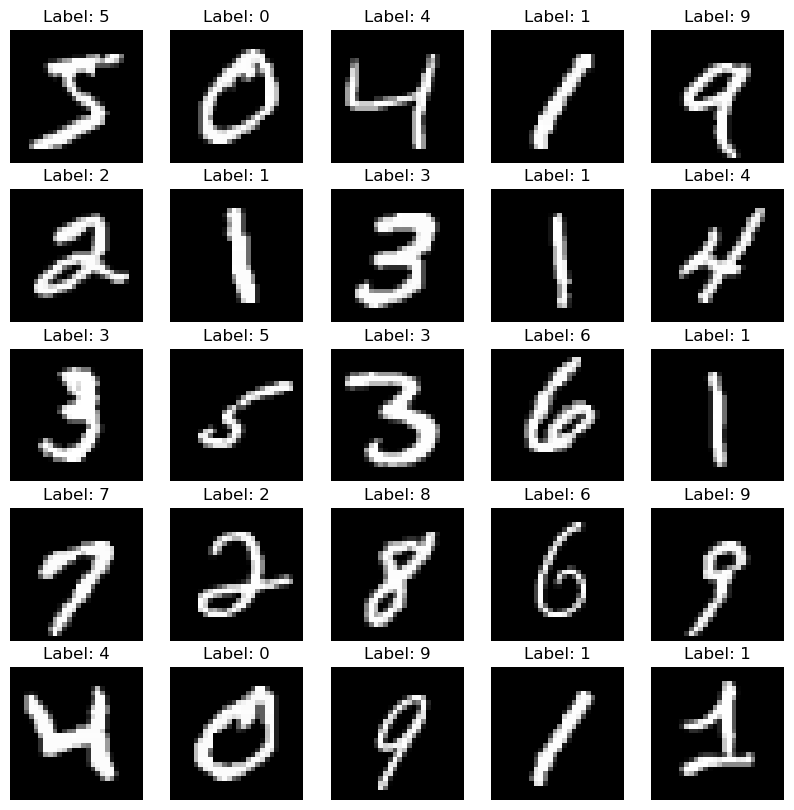

In [13]:
import matplotlib.pyplot as plt #plot a random sample of images

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10)) # رسم عينة عشوائية من الصور

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='gray') # تدرج الالوان الافتراضي
    ax.set_title(f"Label: {train_labels[i].argmax()}")
    ax.axis('off')
    
plt.show()

In [13]:
len(train_images)
len(train_labels)

60000

# تدرج الألوان المستخدم في الرسم البياني يمكن تعيينه باستخدام الوسيطة cmap في دالة imshow() في matplotlib. cmap هي اختصار لـ "colormap" وتحدد تدرج الألوان المستخدمة في تمثيل الصورة.

# تدرج الألوان الافتراضي هو اللون الرمادي (grayscale)، ولكن يمكنك استخدام تدرج ألوان مختلفة لإظهار الصورة بألوان مختلفة. بعض التدرجات الشائعة التي يمكن استخدامها تشمل:

# cmap='viridis': تدرج الألوان يتراوح من اللون الأزرق إلى اللون الأصفر الفاتح.
# cmap='jet': تدرج الألوان مزيج من اللون الأزرق والأخضر والأحمر.
# cmap='hot': تدرج الألوان يمثل درجات الحرارة المرتفعة بألوان دافئة مثل الأحمر والبرتقالي.
# هناك العديد من تدرجات الألوان المتاحة في matplotlib، يمكنك استكشافها واختيار الأنسب لاحتياجاتك. يمكنك العثور على قائمة كاملة لتدرجات الألوان المتاحة في وثائق matplotlib الرسمية

KeyError: 'val_accuracy'

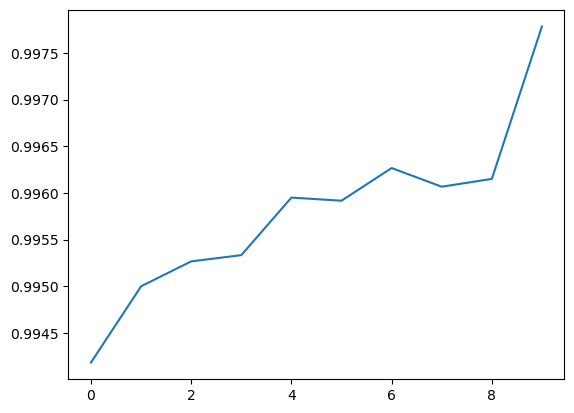

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()